# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [22]:
df = pd.read_csv("data/ames.csv", index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [23]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [24]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [25]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

Text(0.5, 1.0, 'Distribution of Sale Price')

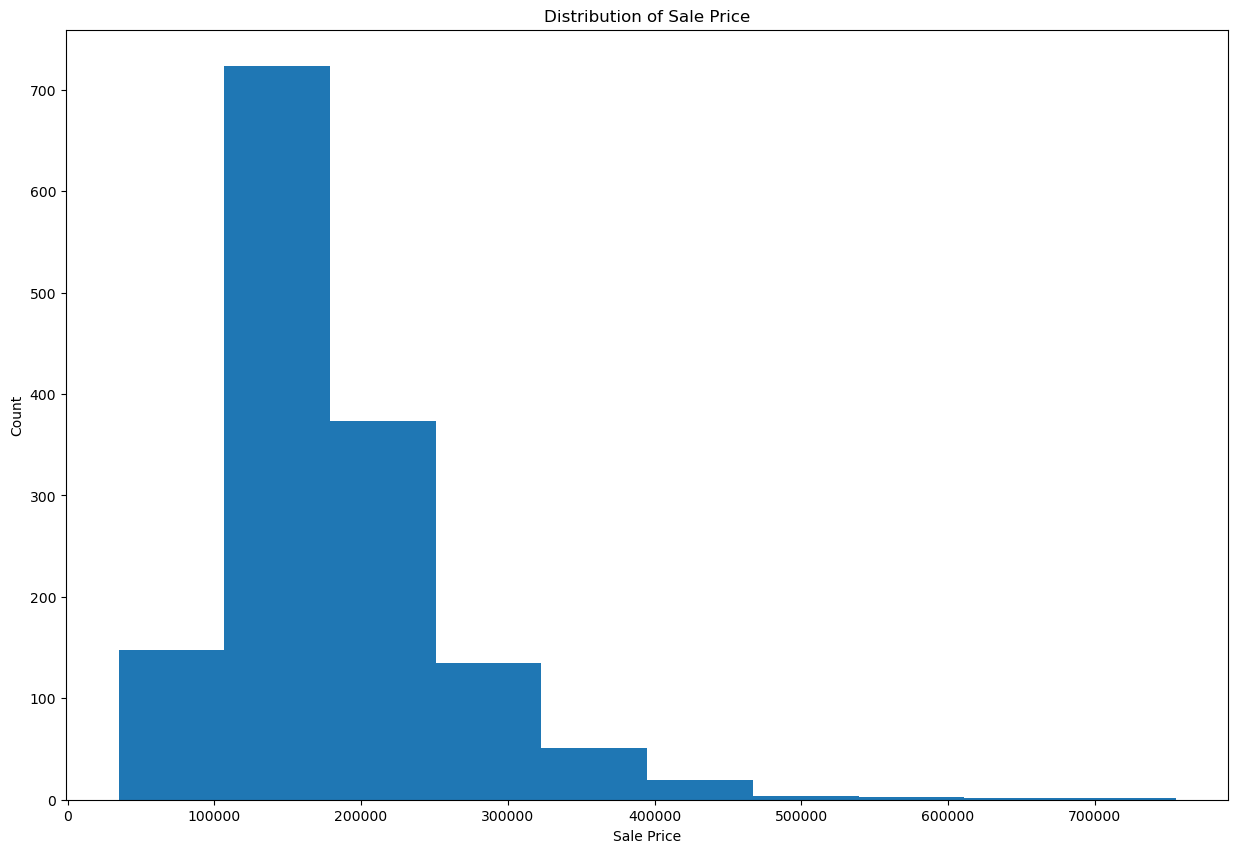

In [26]:
fig,ax = plt.subplots(figsize=(15,10))
plt.hist(df["SalePrice"])
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Distribution of Sale Price")

Now, print out the mean, median, and standard deviation:

In [27]:
def stats(column):
  print("Mean:    ", df[column].mean())
  print("Median:  ", df[column].median())
  print("Std:     ", df[column].std())

In [28]:
stats("SalePrice")

Mean:     180921.19589041095
Median:   163000.0
Std:      79442.50288288663


In the cell below, interpret the above information.

**_The average sales price of a house is $180,921, with $163,000 being the sales price of the house in the middle of the data set.
On average, most houses in the area are sold for between $101,479 and $260,363.
The distribution is skewed to the right/ positively skewed._**

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

Text(0.5, 1.0, 'Distribution of Rooms Above Ground')

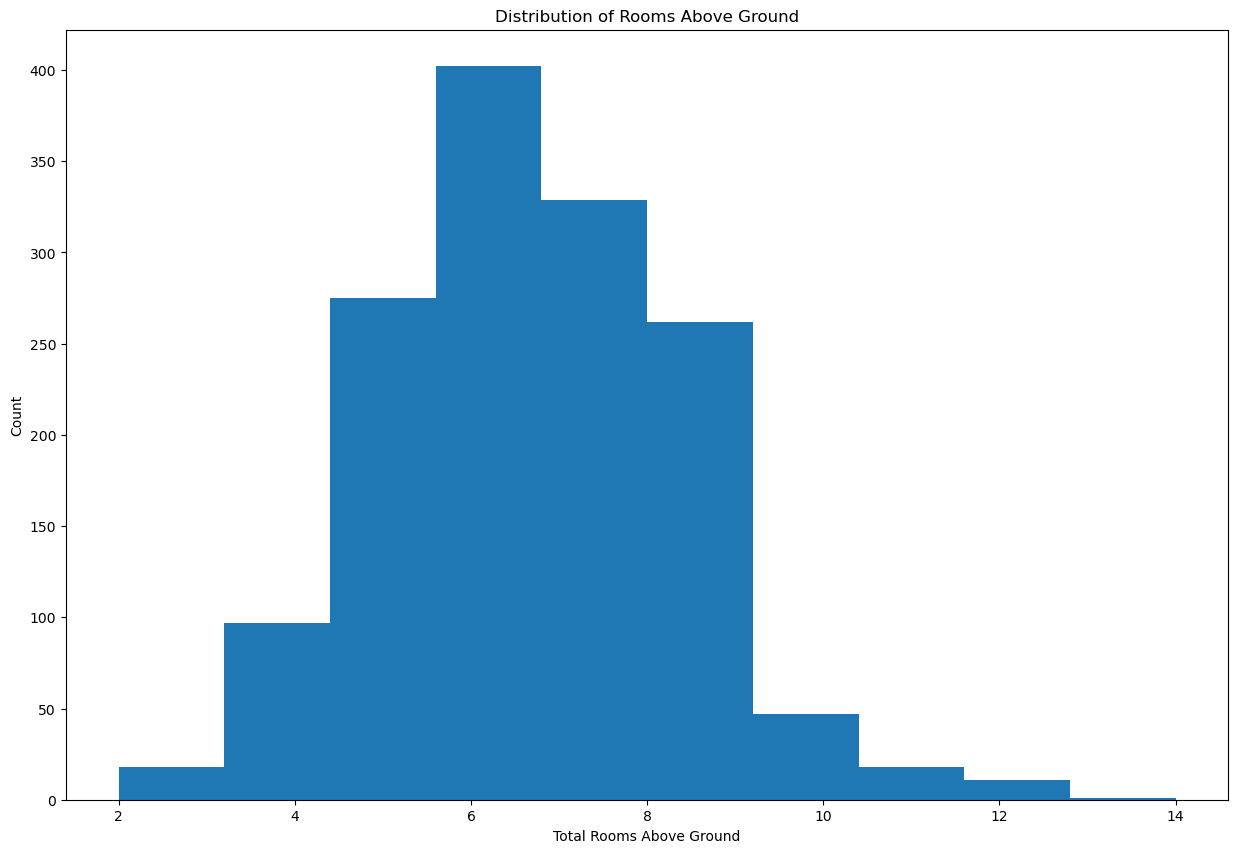

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
plt.hist(df["TotRmsAbvGrd"])
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("Count")
plt.title("Distribution of Rooms Above Ground")

Now, print out the mean, median, and standard deviation:

In [30]:
stats("TotRmsAbvGrd")

Mean:     6.517808219178082
Median:   6.0
Std:      1.625393290584064


In the cell below, interpret the above information.

**_Houses in the area tend to have around 6.5 total rooms above ground. A normal distribution can be observed, as the mean = 6.5 and median = 6._**

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

Text(0.5, 1.0, 'Distribution of Overall Condition')

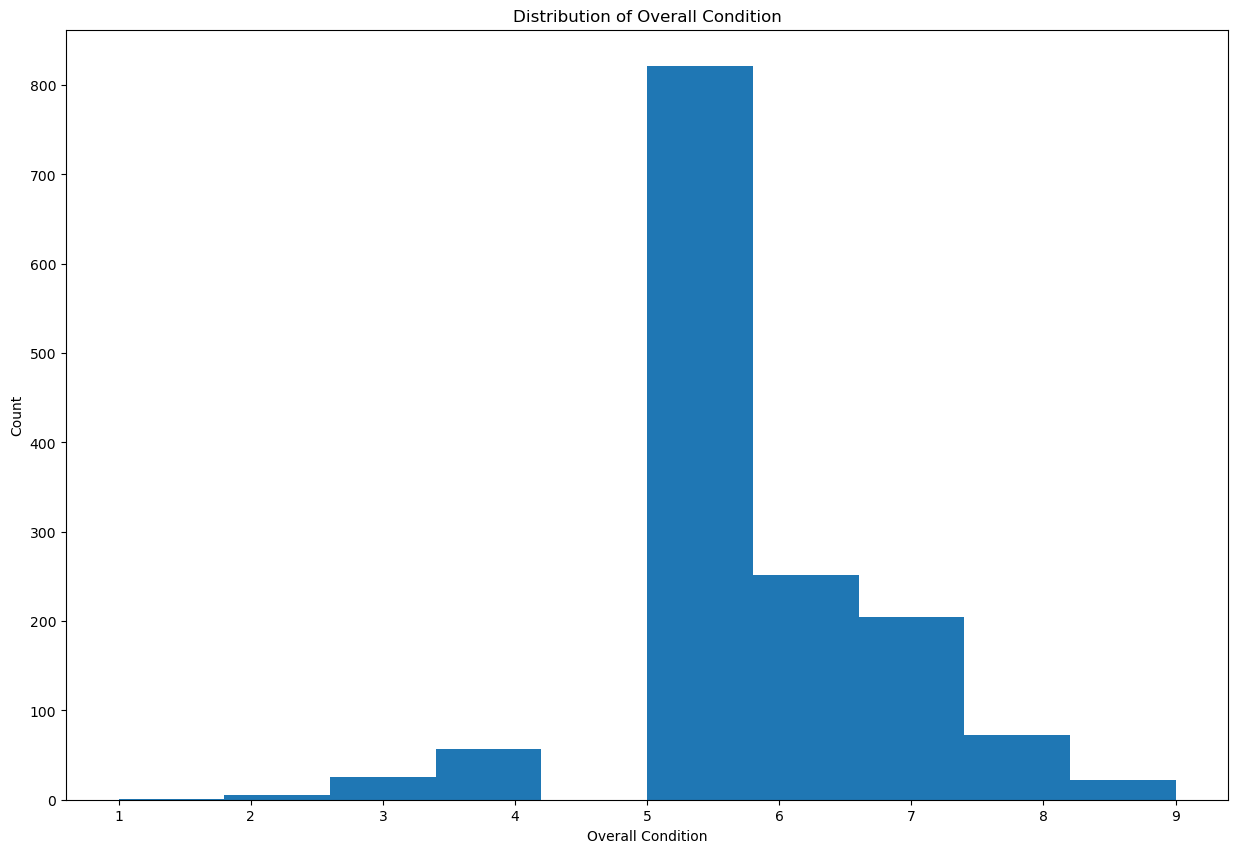

In [31]:
fig,ax = plt.subplots(figsize=(15,10))
plt.hist(df["OverallCond"])
plt.xlabel("Overall Condition")
plt.ylabel("Count")
plt.title("Distribution of Overall Condition")

Now, print out the mean, median, and standard deviation:

In [32]:
stats("OverallCond")

Mean:     5.575342465753424
Median:   5.0
Std:      1.1127993367127367


In the cell below, interpret the above information.

**_Despite a mean of 5.58 and a median of 5, which indicate a normal distribution, there is a drastic difference in the distribution of Overall Condition. This may indicate that it would be better to group the data into categories._**

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [33]:
# Replace None with appropriate code
below_average_condition = df.loc[df['OverallCond']<5]
average_condition = df.loc[df['OverallCond']==5]
above_average_condition = df.loc[df['OverallCond']>5]

In [34]:
abb = above_average_condition.sort_values(by='SalePrice',ascending=False)
abb.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000
689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,392000
1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000


In [35]:
count_below_average = len(below_average_condition)
count_average = len(average_condition)
count_above_average = len(above_average_condition)

condition_series = pd.Series({
  "Below Average": count_below_average,
  "Average": count_average,
  "Above Average": count_above_average
})

print(f"""
      Number of houses with below average conditions: {count_below_average} -> {round(condition_series["Below Average"]/condition_series.sum()*100,2)}%
      Number of houses with average conditions: {count_average} -> {round(condition_series["Average"]/condition_series.sum()*100,2)}%
      Number of houses with above average conditions: {count_above_average} -> {round(condition_series["Above Average"]/condition_series.sum()*100,2)}%
      """)


      Number of houses with below average conditions: 88 -> 6.03%
      Number of houses with average conditions: 821 -> 56.23%
      Number of houses with above average conditions: 551 -> 37.74%
      


In [36]:
df_sale_condition = df[['SalePrice','OverallCond']].sort_values(by='SalePrice',ascending=False)
df_sale_condition.head()

,SalePrice,OverallCond
Id,,
692,755000,6
1183,745000,5
1170,625000,5
899,611657,5
804,582933,5


The following code checks that you created the subsets correctly:

In [37]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

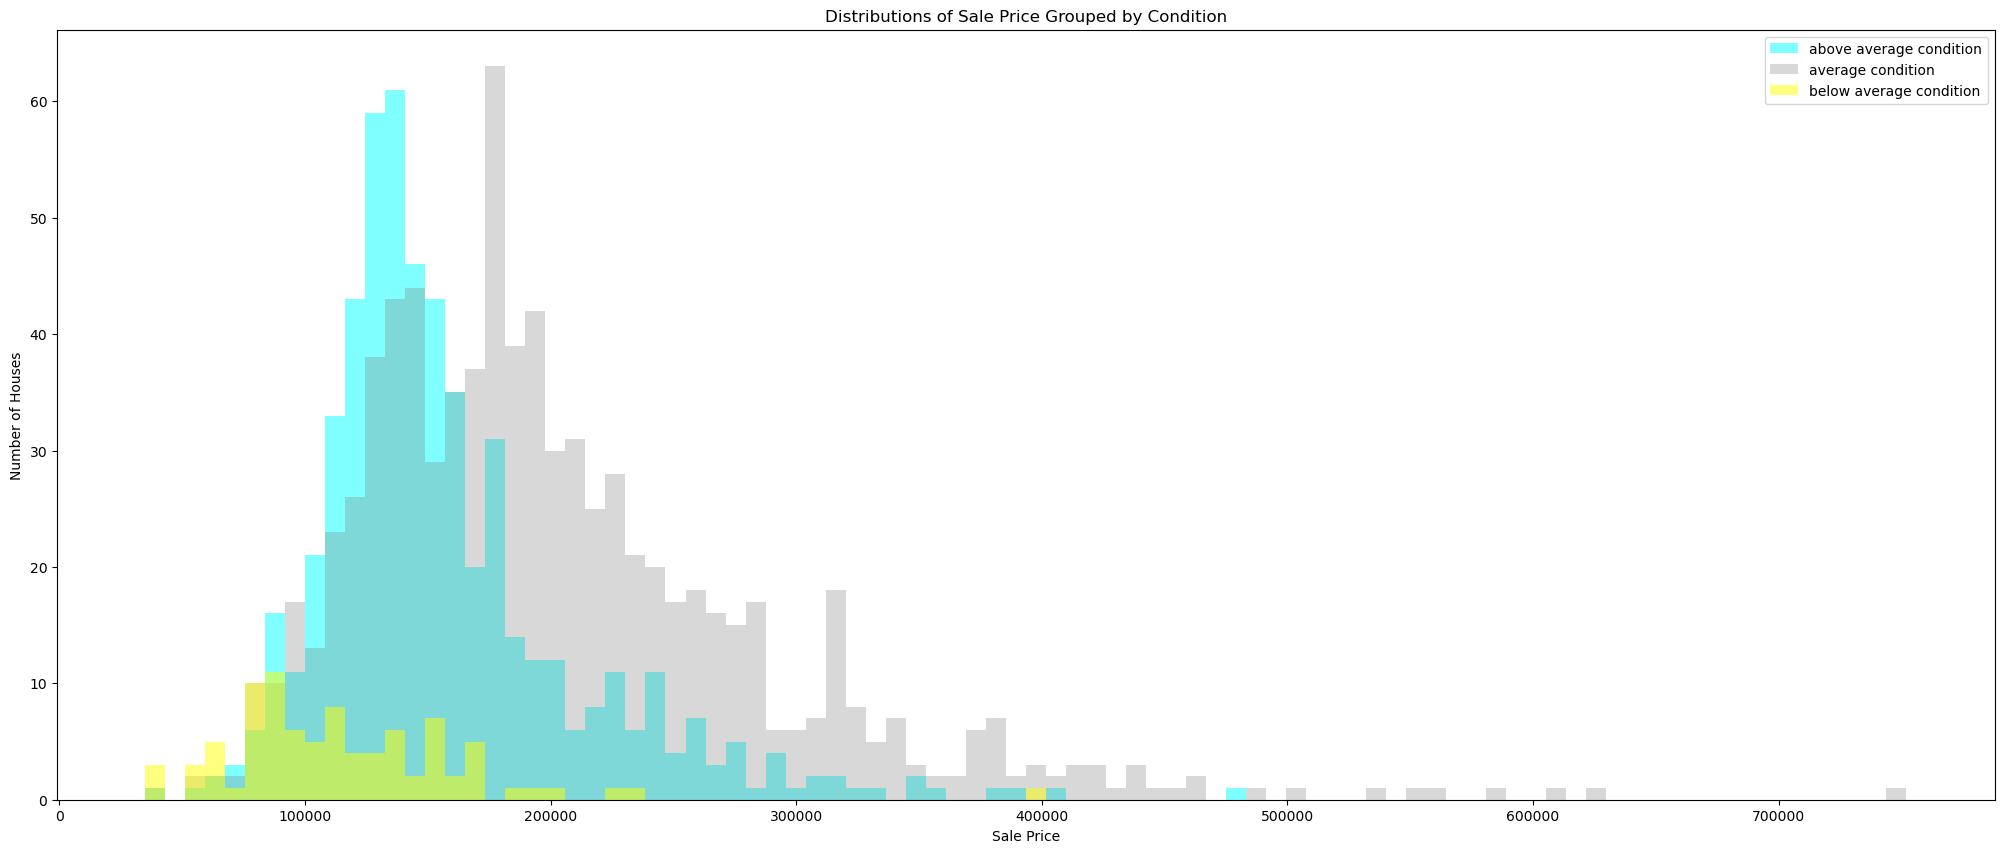

In [38]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(25,10))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

**_Firstly, slightly more than 1/3 of the houses being sold have an above average condition, while more than half of the houses sold have an average condition.This leaves roughly 6% of the houses sold with a below average condition._**

**_Furthermore, the houses with an average condition hold the top positions in terms of sale price, with average conditioned houses taking 8 of the top 10 positions for most expensive houses._**

**_It is interesting to see that houses in the average condition range have higher sale prices on average than above average condition houses. One would expect that houses with above average condition would have the highest sale prices, but these houses tend to have sale prices between the$100k-$200k mark. This deserves a closer look into as this goes against what is expected._**

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [39]:
correlation = df.corr(method='pearson',numeric_only=True)['SalePrice'].sort_values()
correlation = correlation[:len(correlation)-1]

print(f"""
      First 5 records of correlation:
      {correlation.head()}
      
      Last 5 records of correlation:
      {correlation.tail()}
      
      Number of records: {len(correlation)}
      """)


      First 5 records of correlation:
      KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64
      
      Last 5 records of correlation:
      TotalBsmtSF    0.613581
GarageArea     0.623431
GarageCars     0.640409
GrLivArea      0.708624
OverallQual    0.790982
Name: SalePrice, dtype: float64
      
      Number of records: 36
      


In [40]:
print(f"""
      Most positively correlated column with SalePrice: {correlation.idxmax()}
      Value/level of correlation: {correlation.max()}
      """)


      Most positively correlated column with SalePrice: OverallQual
      Value/level of correlation: 0.7909816005838053
      


Now, find the ***most negatively correlated*** column:

In [41]:
print(f"""
      Most negatively correlated column with SalePrice: {correlation.idxmin()}
      Value/level of correlation: {correlation.min()}
      """)


      Most negatively correlated column with SalePrice: KitchenAbvGr
      Value/level of correlation: -0.13590737084214105
      


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

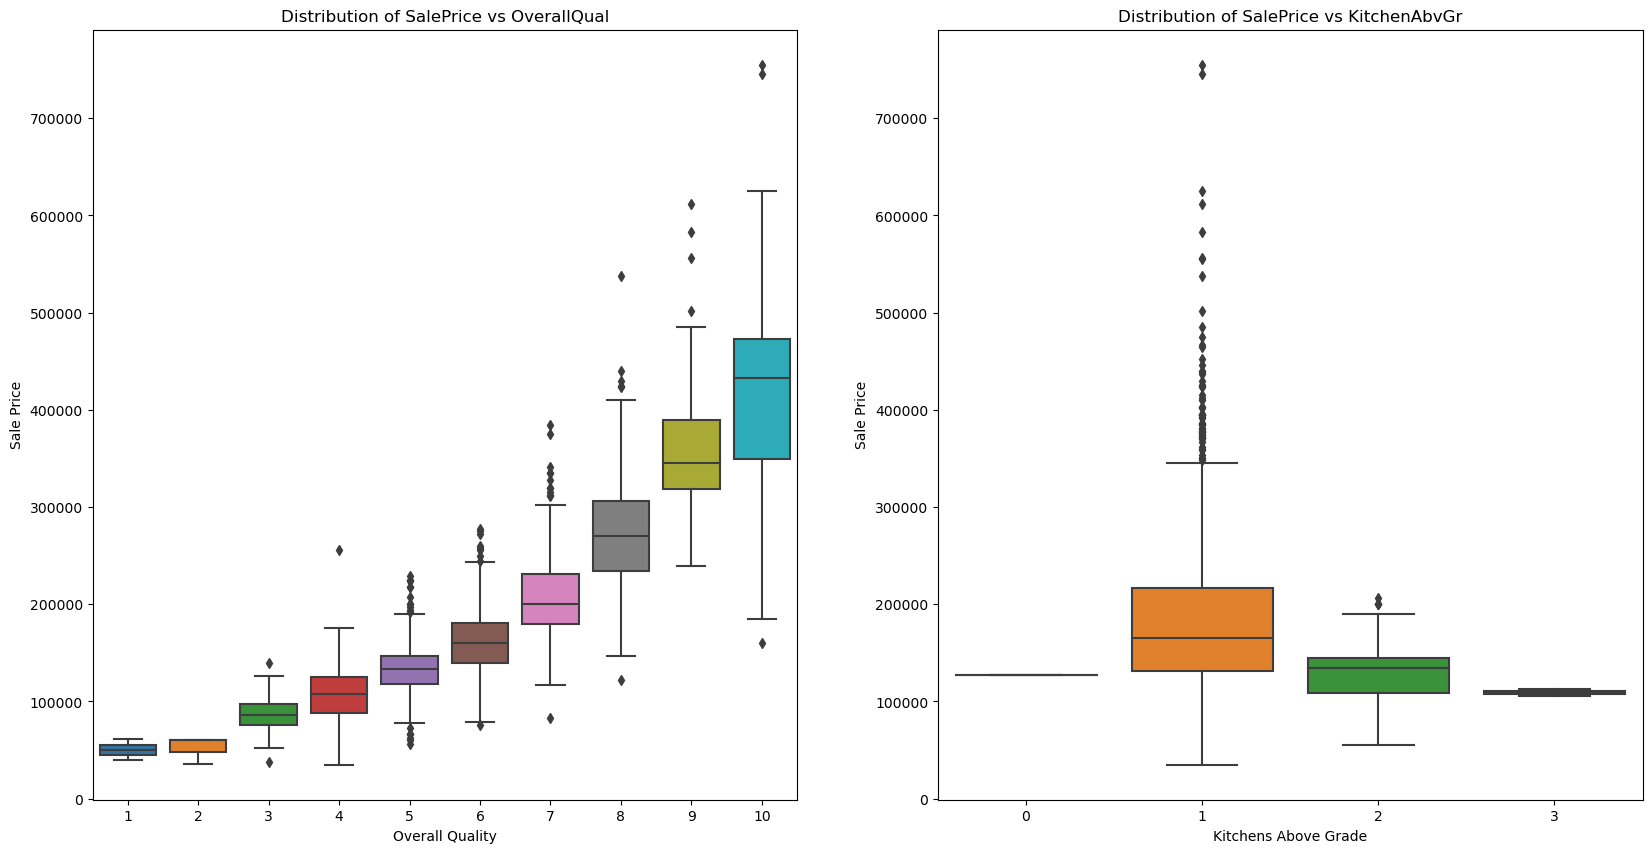

In [44]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['OverallQual'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['KitchenAbvGr'],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title('Distribution of SalePrice vs OverallQual')
ax1.set_xlabel('Overall Quality')
ax1.set_ylabel("Sale Price")
ax2.set_title('Distribution of SalePrice vs KitchenAbvGr')
ax2.set_xlabel('Kitchens Above Grade')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

_The Overall Quality has the highest correlation with the Sales Price._

*_As per the description file, the overall quality ranks the overall material and finish of the house on a sliding scale, with 1 representing a very poor overall quality and 10 representing a very excellent quality._*
*_This category is somewhat similar to the Overall Condition category, with further clarification needed on the difference._*

*_As per the graph, there is a clear positive relationship between the overall quality and the sale price, with higher quality houses tending to have higher sales prices than lower quality houses. One interesting point to note is that the median sale price of houses with the highest overall quality exceeds the maximum sale price of the houses with an overall quality of 8._*
*_Also, as you move up the scale that ranks the overall quality of houses, the IQR of each category begins to increase, with more outlying values being seen the further up the scale you move_*

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [45]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

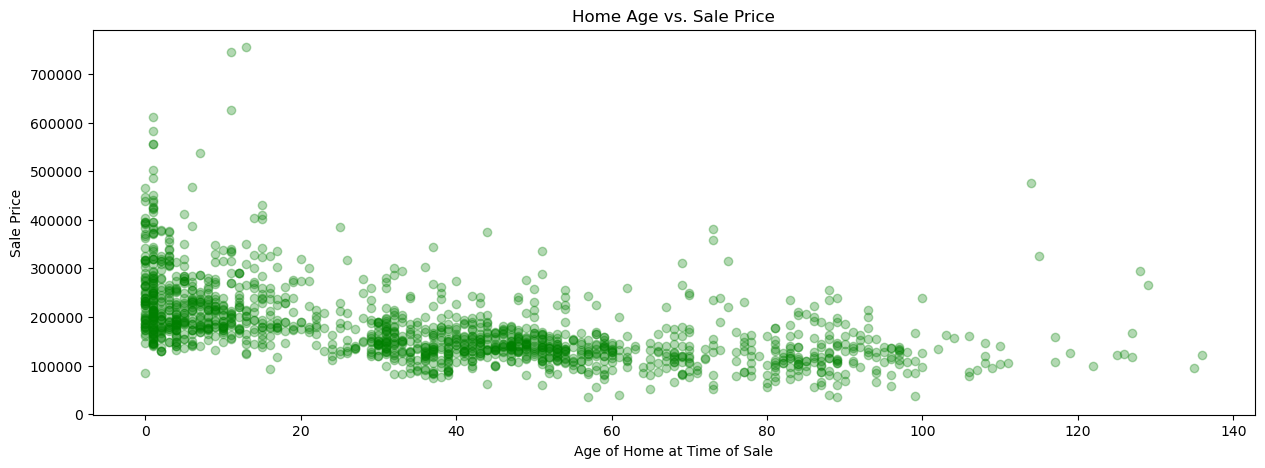

In [46]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

_On average, we can see that newer homes have a higher sale price than older homes._

*However, it is surprising to see that the top 3 homes with the highest sale price are not the newest homes. This indicates that there are other factors that come into play when determining the sale price of a home, with the age of the home being one of the factors*

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.